In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df['Present_Price'].fillna(df['Present_Price'].median(), inplace=True)
df['Kms_Driven'].fillna(df['Kms_Driven'].median(), inplace=True)
df['Fuel_Type'].fillna(df['Fuel_Type'].mode()[0], inplace=True)
df['Seller_Type'].fillna(df['Seller_Type'].mode()[0], inplace=True)
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['Owner'].fillna(df['Owner'].mode()[0], inplace=True)

In [5]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)


In [6]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)
print (y_pred_lm)

[ 2.95534303  8.178939    6.45427257 -1.42417501  9.08889914  7.41825441
  1.33644285  0.84027217  1.36501949  7.49026806  9.11830017  0.58573931
  8.41612774  3.42316502  6.90043281  3.04988309  0.48448171 10.70970753
  1.75207005  2.34571752  0.39746889  8.11925338  6.62469317  2.65939066
  0.78280554  3.69330765  5.24815462  2.82676351  2.13640446  1.75237686
  0.39730155  9.11750503 -0.66188053  2.29098014  8.57067341  4.4910324
  7.20530369  7.53824015  2.89101139  7.93588794  3.93585154  4.27133211
  4.33205704  0.6008847   7.34025071  0.47602539  7.29187681 11.23125597
  3.13805132  5.38262985  6.7988422   2.17888955 20.63303305 17.0015261
  7.50717349  9.69621308  4.47478116  8.97377615  1.82294639  7.60416734
  0.22226536]


In [12]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print (y_pred_ridge)

[ 2.90131068  8.1952302   6.40362854 -1.36836337  9.11434327  7.37421664
  1.35764312  0.85271316  1.38499155  7.44607969  9.08100851  0.60071291
  8.34504386  3.36861757  6.85083764  3.03819298  0.49270168 10.74458995
  1.77481436  2.37104455  0.40643217  8.07629357  6.56908038  2.63252558
  0.79863141  3.67832663  5.25022673  2.80620724  2.16239525  1.77597345
  0.40715548  9.08880963 -0.66078336  2.26625138  8.53615246  4.48417049
  7.22459399  7.55266691  2.87649418  7.95169019  3.92278013  4.18534026
  4.32050627  0.61921745  7.29366985  0.49000203  7.30591698 11.18954159
  3.11928402  5.32267143  6.71982939  2.20364164 20.59580165 16.93403212
  7.46800235  9.64016349  4.46224828  8.94008969  1.79074242  7.52985982
  0.23400587]


In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print (y_pred_lasso)

[ 2.06198099  8.52820795  5.78235553 -0.3259443   9.61700926  6.79762267
  1.70548486  1.09632734  1.70103854  6.88246407  8.55083011  0.89395279
  7.37080891  2.5071117   6.22871027  3.03610756  0.70896024 11.31533687
  2.11351054  2.74480675  0.61779453  7.49918311  5.88004373  2.45378996
  1.08839481  3.64628569  5.43521512  2.71342237  2.54525255  2.14133384
  0.6306575   8.73598922 -0.51124977  2.1618614   8.07396034  4.53251446
  7.64381663  7.96571303  2.83591191  8.36834513  4.02204463  3.1593391
  4.30497751  0.94319165  6.68243135  0.76967856  7.63851261 10.67515669
  3.020716    4.57468962  5.65294257  2.56960578 19.96260987 15.85910058
  6.9577202   8.84045664  4.41825287  8.48917883  1.61466784  6.48177823
  0.48326233]


In [14]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)
y_pred_elasticnet = elasticnet.predict(X_test)
print(y_pred_elasticnet)

[ 2.24570869  8.45899647  5.88194237 -0.51363214  9.51200313  6.89626371
  1.65091214  1.05702633  1.65408488  6.97655591  8.64780596  0.84420008
  7.55361895  2.69660212  6.33052721  3.01856256  0.6697178  11.20745857
  2.06491349  2.69003174  0.58176621  7.59984898  5.99079829  2.46114787
  1.04145394  3.63099603  5.38527815  2.70639085  2.48908772  2.08595393
  0.59261074  8.79407891 -0.54342492  2.15002576  8.15525398  4.50809018
  7.55378714  7.86711943  2.82486095  8.27126789  3.9683366   3.32969082
  4.29126672  0.8906688   6.78687857  0.7222453   7.56518551 10.7704615
  3.01916211  4.69597203  5.8497555   2.51622501 20.10243097 16.0791951
  7.04528319  8.99819613  4.41154096  8.56836082  1.61032727  6.68204038
  0.44103565]


In [15]:
def evaluate_model(y_true, y_pred):
    sse = np.sum((y_true - y_pred) ** 2)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return sse, mse, rmse, r2

In [16]:
sse_lm, mse_lm, rmse_lm, r2_lm = evaluate_model(y_test, y_pred_lm)
sse_ridge, mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
sse_lasso, mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)
sse_elasticnet, mse_elasticnet, rmse_elasticnet, r2_elasticnet = evaluate_model(y_test, y_pred_elasticnet)


In [17]:
print(f"Linear Regression - SSE: {sse_lm}, RMSE: {rmse_lm}, R2: {r2_lm}")
print(f"Ridge Regression - SSE: {sse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")
print(f"Lasso Regression - SSE: {sse_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}")
print(f"ElasticNet Regression - SSE: {sse_elasticnet}, RMSE: {rmse_elasticnet}, R2: {r2_elasticnet}")

Linear Regression - SSE: 212.20704220950904, RMSE: 1.8651552135540057, R2: 0.8489813024894818
Ridge Regression - SSE: 210.61813042195126, RMSE: 1.8581593678760255, R2: 0.8501120632131489
Lasso Regression - SSE: 212.23637256859504, RMSE: 1.865284106029555, R2: 0.8489604293243852
ElasticNet Regression - SSE: 208.88153460104743, RMSE: 1.850483032204345, R2: 0.85134792436198


In [18]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lm.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elasticnet.coef_
})

print(coefficients)


                  Feature    Linear     Ridge     Lasso  ElasticNet
0                    Year  0.353801  0.357543  0.393413    0.389591
1           Present_Price  0.429153  0.432180  0.473347    0.466251
2              Kms_Driven -0.000006 -0.000006 -0.000004   -0.000004
3                   Owner -0.903760 -0.853073 -0.000000   -0.151159
4        Fuel_Type_Diesel  2.533273  1.673807  0.988871    0.664777
5        Fuel_Type_Petrol  0.738464 -0.072949 -0.000000   -0.467578
6  Seller_Type_Individual -1.190593 -1.147914 -0.634599   -0.703798
7     Transmission_Manual -1.639022 -1.563131 -0.382037   -0.616966


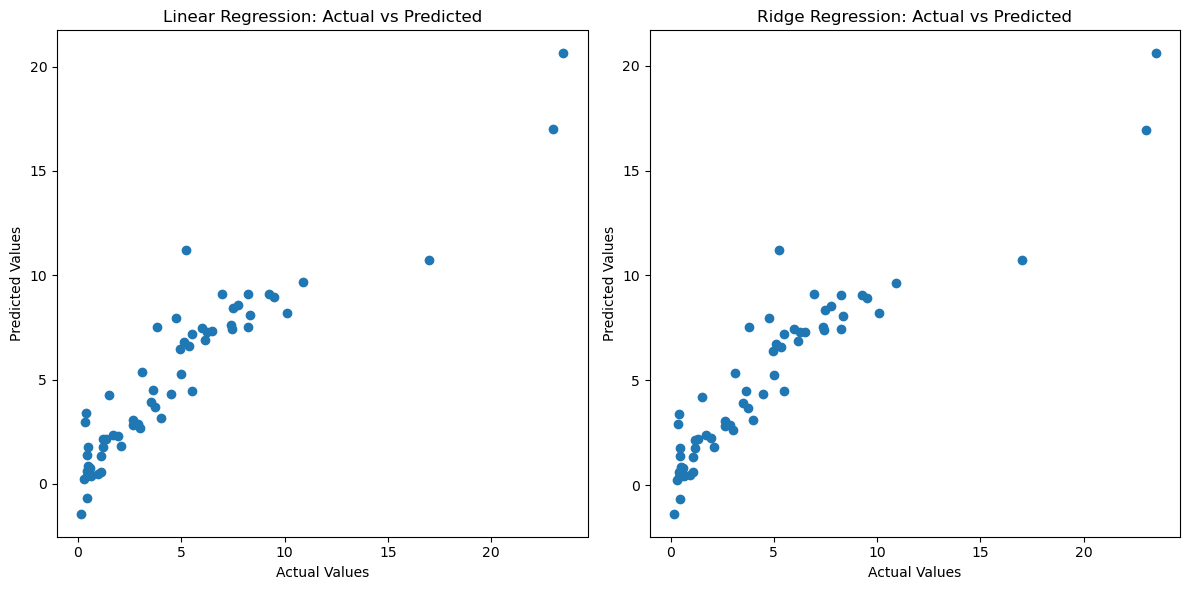

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lm)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge)
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()